<a href="https://colab.research.google.com/github/tazar09/heroes_3/blob/main/Copy_of_h3_castles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
list_of_castles = ['Castle', 'Rampart', 'Tower', 'Inferno', 'Necropolis', 'Dungeon', 'Stronghold', 'Fortress', 'Conflux']
url = 'https://heroes.thelazy.net/index.php/'

In [ ]:
url_castles = []
for x in list_of_castles:
  url_castles.append(url + x)
url_castles

['https://heroes.thelazy.net/index.php/Castle',
 'https://heroes.thelazy.net/index.php/Rampart',
 'https://heroes.thelazy.net/index.php/Tower',
 'https://heroes.thelazy.net/index.php/Inferno',
 'https://heroes.thelazy.net/index.php/Necropolis',
 'https://heroes.thelazy.net/index.php/Dungeon',
 'https://heroes.thelazy.net/index.php/Stronghold',
 'https://heroes.thelazy.net/index.php/Fortress',
 'https://heroes.thelazy.net/index.php/Conflux']

In [ ]:
dfs = []
for i, x in enumerate(url_castles):
  match_castle = str(list_of_castles[i]) + ' ' + 'creatures'
  df = pd.read_html(x, match = match_castle)
  dfs.append(df)

1. Castle

In [ ]:
df_castle = pd.DataFrame(dfs[0][0])
df_castle.columns = df_castle.columns.droplevel()
df_castle['Town'] = 'Castle'

2. Rampart

In [ ]:
df_rampart = pd.DataFrame(dfs[1][0])
df_rampart.columns = df_rampart.columns.droplevel()
df_rampart['Town'] = 'Rampart'

3. Tower

In [ ]:
df_tower = pd.DataFrame(dfs[2][0])
df_tower.columns = df_tower.columns.droplevel()
df_tower['Town'] = 'Tower'

4. Inferno

In [ ]:
df_inferno = pd.DataFrame(dfs[3][0])
df_inferno.columns = df_inferno.columns.droplevel()
df_inferno['Town'] = 'Inferno'

5. Necropolis

In [ ]:
df_necropolis = pd.DataFrame(dfs[4][0])
df_necropolis.columns = df_necropolis.columns.droplevel()
df_necropolis['Town'] = 'Necropolis'

6. Dungeon

In [ ]:
df_dungeon = pd.DataFrame(dfs[5][0])
df_dungeon.columns = df_dungeon.columns.droplevel()
df_dungeon['Town'] = 'Dungeon'
# df_dungeon.drop('', axis = 1, inplace = True)

7. Stronghold

In [ ]:
url2 = 'https://heroes.thelazy.net/index.php/Stronghold'
df_stronghold = pd.read_html(url2, match = 'Fortress creatures')
df_stronghold = pd.DataFrame(df_stronghold[0])
df_stronghold.columns = df_stronghold.columns.droplevel()
df_stronghold['Town'] = 'Stronghold'

8. Fortress

In [ ]:
df_fortress = pd.DataFrame(dfs[7][0])
df_fortress.columns = df_fortress.columns.droplevel()
df_fortress['Town'] = 'Fortress'

9. Conflux

In [ ]:
df_conflux = pd.DataFrame(dfs[8][0])
df_conflux.columns = df_conflux.columns.droplevel()
df_conflux['Town'] = 'Conflux'

10. Cove

In [ ]:
url2 = 'https://heroes.thelazy.net/index.php/Cove'
df_cove = pd.read_html(url2, match = 'Cove creatures')
df_cove = pd.DataFrame(df_cove[0])
df_cove.columns = df_cove.columns.droplevel()
df_cove['Town'] = 'Cove'
df_cove.loc[6, 'Lvl'] = "3+"
#exclusion of first level 3 creature for uniformity
df_cove.drop(index = 4, axis = 0, inplace = True)
df_cove = df_cove.reset_index(drop = True)
df_cove.loc[4, 'Lvl'] = '3'
# df_cove.head(20)

_______________________________________________________________________________________________________________________________________________________________

All castles joined

In [ ]:
df_towns = pd.concat([df_castle, df_rampart, df_tower, df_inferno, df_necropolis, df_dungeon, df_stronghold, df_fortress, df_conflux, df_cove] , axis = 0)

Preprocessing

In [ ]:
df_towns['Level'] = df_towns['Lvl'].str.replace('+', '.5').str.replace('*', '')
df_towns['Level'] = df_towns['Level'].astype(float)
df_towns.drop('Lvl', axis = 1, inplace = True)

<ipython-input-16-8aec613eca71>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_towns['Level'] = df_towns['Lvl'].str.replace('+', '.5').str.replace('*', '')


In [ ]:
df = df_towns[['Name', 'Town', 'Level', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Grw', 'Val','Cost', 'Unnamed: 12_level_1', 'Special']]
df['Unnamed: 12_level_1'] = df['Unnamed: 12_level_1'].fillna('0')
df['Special'] = df['Special'].fillna('No')
df = df.rename(columns={'Unnamed: 12_level_1':'Resource'})
df['Resource'] = df['Resource'].str.get(-1).astype(int)
df['Ranged'] = df['Special'].apply(lambda x: 1 if 'Ranged' in x else 0)
df['Flyer'] = df['Special'].apply(lambda x: 1 if 'Fly' in x or 'Teleporting' in x else 0)
df['no_retaliation'] = df['Special'].apply(lambda x: 1 if 'No enemy retaliation' in x else (0.2 if any(s in x for s in ['Petrify', 'Paralyze']) else 0))
df['Upgraded'] = df['Level'].apply(lambda x: 1 if ((x / 0.5)%2 == 1) else 0)

________________________________________________________________________________________________________________________________

Adding AI value and Fight Value

In [ ]:
df_ai_value_sod = pd.read_excel('/content/sample_data/h3_castles/h3_ai_value_sod.xlsx')
df_ai_value_hoa = pd.read_excel('/content/sample_data/h3_castles/h3_ai_value_hoa.xlsx')

In [ ]:
df_ai_value_sod['Creature'] = df_ai_value_sod['Creature'].str.strip()
df_ai_value_hoa['Creature'] = df_ai_value_hoa['Creature'].str.strip()
df = df.merge(df_ai_value_hoa, how = 'left', left_on = 'Name', right_on = 'Creature')

In [ ]:
df.tail(5)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,Creature,AI Value,Fight Value
135,Sorceress,Cove,5.5,12,9,10,16,35,7,3,...,565,0,"Ranged (12 shots), Casts Weakness / Disrupting...",1,0,0.0,1,Sorceress,852,655
136,Nix,Cove,6.0,13,16,18,22,80,6,2,...,1000,0,Ignores 30% of enemy attack value,0,0,0.0,0,Nix,1415,1415
137,Nix Warrior,Cove,6.5,14,17,18,22,90,7,2,...,1300,0,Ignores 60% of enemy attack value,0,0,0.0,1,Nix Warrior,2116,1763
138,Sea Serpent,Cove,7.0,22,16,30,55,180,9,1,...,2200,1,Poisonous,0,0,0.0,0,Sea Serpent,3953,3162
139,Haspid,Cove,7.5,29,20,30,55,300,12,1,...,4000,2,"Poisonous, Revenge",0,0,0.0,1,Haspid,7220,5554


_________________________________________________________________________________________________________________

We used Horn of the Abyss Ai value and Fight Value, because Shadow of Death did not have records for Cove units. However, we display the differences in the following lines.

In [ ]:
df_merged = df_ai_value_sod.merge(df_ai_value_hoa, on = 'Creature', how = 'left')

In [ ]:
df_merged['AI_dif'] = df_merged['AI Value_y'] - df_merged['AI Value_x']
df_merged['Fight_dif'] = df_merged['Fight Value_y'] - df_merged['Fight Value_x']
df_diff = df_merged[(df_merged['AI_dif'] != 0) | (df_merged['Fight_dif'] != 0)].head(500)

In [ ]:
df_diff.head(20)

,Creature,AI Value_x,Fight Value_x,AI Value_y,Fight Value_y,AI_dif,Fight_dif
3,Faerie Dragon,19580,16317,30501,16317,10921,0
17,Firebird,4547,3248,4336,3097,-211,-151
30,Efreet Sultan,1848,1584,2343,1802,495,218
76,Monk,485,485,582,485,97,0
93,Nomad,345,285,345,415,0,130


In [ ]:
print('There were only {} differences. There where {} neutral creatures, and {} factions\' creatures. \nRegarding the towns\' changes, we note the {}, {} and {}.\nSo, we will keep the HoA scores.' \
      .format(df_diff.shape[0], df_diff.loc[[3,93]].shape[0], df_diff.loc[[17,30,76]].shape[0], df_diff.loc[17, 'Creature'], df_diff.loc[30, 'Creature'], df_diff.loc[76, 'Creature']))

There were only 5 differences. There where 2 neutral creatures, and 3 factions' creatures. 
Regarding the towns' changes, we note the Firebird, Efreet Sultan and Monk.
So, we will keep the HoA scores.


________________________________________________________________________________________________________

In [ ]:
df0 = df.drop(['Creature'], axis = 1)

In [ ]:
df0.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,Val,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,80,60,0,Immune to jousting,0,0,0.0,0,80,100
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,115,75,0,Immune to jousting,0,0,0.0,1,115,115
2,Archer,Castle,2.0,6,3,2,3,10,4,9,126,100,0,Ranged (12 shots),1,0,0.0,0,126,115
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,184,150,0,"Ranged (24 shots), Double attack",1,0,0.0,1,184,115
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,351,200,0,"Flying, Two retaliations",0,1,0.0,0,351,324


In [ ]:
df = df0

___________________

_____________


___________

________________________________________________________________________________________________________________________________________________________________
End of first part: df0 is the starting dataframe
________________________________________________________________________________________________________________________________________________________________

Enhancing the data with special ability modelling: multiple attacks, magic immunity/resistance, spell casting etc.

1. Multiple attacks column

In [ ]:
df['multi_att'] = df['Special'].apply(lambda x:
                                      1 if 'Double attack' in x or 'Ferocity' in x else
                                      0.5 if 'all adjacent' in x else
                                      0.3 if any(item in x for item in ['Breath attack', '3-headed attack', 'Death blow', 'Unlimited', 'Fireball attack', 'Death cloud'])
                                      else 0)

Checking the results


In [ ]:
words = ['Double', 'Breath', 'Ferocity', 'adjacent', '3-headed', 'Death blow', 'Unlimited', 'Fireball attack', 'Death cloud']
pattern = '|'.join(words)
mask = df['Special'].str.contains(pattern)
df[mask]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,150,0,"Ranged (24 shots), Double attack",1,0,0.0,1,184,115,1.0
5,Royal Griffin,Castle,3.5,9,9,3,6,25,9,7,...,240,0,"Flying, Unlimited retaliations",0,1,0.0,1,448,364,0.3
7,Crusader,Castle,4.5,12,12,7,10,35,6,4,...,400,0,Double attack,0,0,0.0,1,588,588,1.0
19,Grand Elf,Rampart,3.5,9,5,3,5,15,7,7,...,225,0,"Ranged (24 shots), Double attack",1,0,0.0,1,331,195,1.0
26,Green Dragon,Rampart,7.0,18,18,40,50,180,10,1,...,2400,1,"Dragon, Flying, Breath attack, 1-3 lvl spells ...",0,1,0.0,0,4872,3654,0.3
27,Gold Dragon,Rampart,7.5,27,27,40,50,250,16,1,...,4000,2,"Dragon, Flying, Breath attack, 1-4 lvl spells ...",0,1,0.0,1,8613,6220,0.3
45,Magog,Inferno,2.5,7,4,2,4,13,6,8,...,175,0,"Ranged (24 shots), Fireball attack",1,0,0.0,1,240,210,0.3
47,Cerberus,Inferno,3.5,10,8,2,7,25,8,5,...,250,0,"No enemy retaliation, 3-headed attack",0,0,1.0,1,392,308,0.3
64,Lich,Necropolis,5.0,13,10,11,13,30,6,3,...,550,0,"Ranged (12 shots), Undead, Death cloud",1,0,0.0,0,848,742,0.3
65,Power Lich,Necropolis,5.5,13,10,11,15,40,7,3,...,600,0,"Ranged (24 shots), Undead, Death cloud",1,0,0.0,1,1079,889,0.3


___________________________________________________________________________
2. Poisonous, aging, disease and similar effects.


In [ ]:
df['poison'] = df['Special'].apply(lambda x:
                                      1 if 'Poison' in x or 'Disease' in x or 'Aging' in x
                                      else 0)

Checking the results.

In [ ]:
words_poison = ['Poison', 'Disease', 'Aging']
pattern_poison = '|'.join(words_poison)
mask = df['Special'].str.contains(pattern_poison)
df[mask]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison
59,Zombie,Necropolis,2.5,5,5,2,3,20,4,8,...,0,"Undead, Disease",0,0,0.0,1,128,160,0.0,1
69,Ghost Dragon,Necropolis,7.5,19,17,25,50,200,14,1,...,1,"Dragon, Undead, Flying, Morale -1, Aging",0,1,0.0,1,4696,3228,0.0,1
109,Wyvern Monarch,Fortress,6.5,14,14,18,22,70,11,2,...,0,"Flying, Poison",0,1,0.0,1,1518,1518,0.0,1
138,Sea Serpent,Cove,7.0,22,16,30,55,180,9,1,...,1,Poisonous,0,0,0.0,0,3953,3162,0.0,1
139,Haspid,Cove,7.5,29,20,30,55,300,12,1,...,2,"Poisonous, Revenge",0,0,0.0,1,7220,5554,0.0,1


___________________________________________________________________________
3. Immunity to some sort of spells.

In [ ]:
df['immunity'] = df['Special'].apply(lambda x:
                                     1 if ' Magic immunity' in x else
                                     0.75 if '1-4 lvl spells immunity' in x else
                                     0.5 if  '1-3 lvl spells immunity' in x else
                                     0.25 if 'Fire immunity' in x else
                                     0.10 if (any(item in x for item in ['Immunity to Mind spells', 'Elemental', 'Unliving']) & ('Magic immunity' not in x)) else
                                     0.03 if any(item in x for item in ['Immune to jousting', 'Immune to Blinding', 'Immune to ice'])
                                     else 0)

Checking the results

In [ ]:
words_immune = ['Immune', 'Immunity', 'immunity', 'Unliving']
pattern_immune = '|'.join(words_immune)
mask2 = df['Special'].str.contains(pattern_immune)
df[mask2]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,Immune to jousting,0,0,0.0,0,80,100,0.0,0,0.03
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,Immune to jousting,0,0,0.0,1,115,115,0.0,0,0.03
26,Green Dragon,Rampart,7.0,18,18,40,50,180,10,1,...,"Dragon, Flying, Breath attack, 1-3 lvl spells ...",0,1,0.0,0,4872,3654,0.3,0,0.50
27,Gold Dragon,Rampart,7.5,27,27,40,50,250,16,1,...,"Dragon, Flying, Breath attack, 1-4 lvl spells ...",0,1,0.0,1,8613,6220,0.3,0,0.75
30,Stone Gargoyle,Tower,2.0,6,6,2,3,16,6,9,...,"Unliving, Flying",0,1,0.0,0,165,150,0.0,0,0.10
31,Obsidian Gargoyle,Tower,2.5,7,7,2,3,16,9,9,...,"Unliving, Flying",0,1,0.0,1,201,155,0.0,0,0.10
32,Stone Golem,Tower,3.0,7,10,4,5,30,3,6,...,"Unliving, Spell Damage Resistance +50%",0,0,0.0,0,250,339,0.0,0,0.10
33,Iron Golem,Tower,3.5,9,10,4,5,35,5,6,...,"Unliving, Spell Damage Resistance +75%",0,0,0.0,1,412,412,0.0,0,0.10
40,Giant,Tower,7.0,19,16,40,60,150,7,1,...,Immunity to Mind spells,0,0,0.0,0,3718,3146,0.0,0,0.10
41,Titan,Tower,7.5,24,24,40,60,300,11,1,...,"Ranged (24 shots), No melee penalty, Immunity ...",1,0,0.0,1,7500,5000,0.0,0,0.10


In [ ]:
df[df['Name'].str.contains('Fire')]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity,diff_
118,Fire Elemental,Conflux,4.0,10,8,4,6,35,6,5,...,0,0,0.0,0,345,345,0.0,0,0.25,0.0
124,Firebird,Conflux,7.0,18,18,30,40,150,15,2,...,0,1,0.0,0,4336,3097,0.3,0,0.25,40.0


In [ ]:
df[df['Special'].str.contains('Teleport')]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity,diff_
126,Nymph,Cove,1.0,5,2,1,2,4,6,16,...,0,1,0.0,0,57,52,0.0,0,0.03,10.0
127,Oceanid,Cove,1.5,6,2,1,3,4,8,16,...,0,1,0.0,1,75,60,0.0,0,0.03,25.0


___________________________________________________________________________________________________
3. Magic resistance or spell eater.

In [ ]:
words_resistance = ['Resistance', 'resistance', 'Resists', 'resists', 'Magic damper', 'Mana drain', 'Spells cost -2 sp']
pattern_resistance = '|'.join(words_resistance)
mask3 = df['Special'].str.contains(pattern_resistance)
df[mask3]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity
16,Dwarf,Rampart,2.0,6,7,2,4,20,3,8,...,Resistance +20%,0,0,0.0,0,138,194,0.0,0,0.0
17,Battle Dwarf,Rampart,2.5,7,7,2,4,20,5,8,...,Resistance +40%,0,0,0.0,1,209,209,0.0,0,0.0
20,Pegasus,Rampart,4.0,9,8,5,9,30,8,5,...,"Flying, Magic damper",0,1,0.0,0,518,407,0.0,0,0.0
21,Silver Pegasus,Rampart,4.5,9,10,5,9,30,12,5,...,"Flying, Magic damper",0,1,0.0,1,532,418,0.0,0,0.0
24,Unicorn,Rampart,6.0,15,14,18,22,90,7,2,...,"Blind, Aura of Resistance +20%",0,0,0.0,0,1806,1548,0.0,0,0.0
25,War Unicorn,Rampart,6.5,15,14,18,22,110,9,2,...,"Blind, Aura of Resistance +20%",0,0,0.0,1,2030,2030,0.0,0,0.0
32,Stone Golem,Tower,3.0,7,10,4,5,30,3,6,...,"Unliving, Spell Damage Resistance +50%",0,0,0.0,0,250,339,0.0,0,0.1
33,Iron Golem,Tower,3.5,9,10,4,5,35,5,6,...,"Unliving, Spell Damage Resistance +75%",0,0,0.0,1,412,412,0.0,0,0.1
34,Mage,Tower,4.0,11,8,7,9,25,5,4,...,"Ranged (24 shots), No melee penalty, No obstac...",1,0,0.0,0,570,418,0.0,0,0.0
35,Arch Mage,Tower,4.5,12,9,7,9,30,7,4,...,"Ranged (24 shots), No melee penalty, No obstac...",1,0,0.0,1,680,467,0.0,0,0.0


In [ ]:
df[df['Name'].str.contains('Mage')]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity
34,Mage,Tower,4.0,11,8,7,9,25,5,4,...,"Ranged (24 shots), No melee penalty, No obstac...",1,0,0.0,0,570,418,0.0,0,0.0
35,Arch Mage,Tower,4.5,12,9,7,9,30,7,4,...,"Ranged (24 shots), No melee penalty, No obstac...",1,0,0.0,1,680,467,0.0,0,0.0
91,Ogre Mage,Stronghold,4.5,13,7,6,12,60,5,4,...,Cast Bloodlust x3,0,0,0.0,1,672,672,0.0,0,0.0


Caster column

In [ ]:
words4 = ['Cast', 'cast', 'Weakness', 'Dispel', 'Curse', 'Spellcaster', 'Resurrect', 'shield', 'Disease']
pattern4 = '|'.join(words4)
mask4 = df['Special'].str.contains(pattern4)
df[mask4]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity
13,Archangel,Castle,7.5,30,30,50,50,250,18,1,...,"Flying, Hates Devils and Arch Devils, Resurrec...",0,1,0.0,1,8776,6033,0.0,0,0.00
37,Master Genie,Tower,5.5,12,12,13,16,40,11,3,...,"Flying, Spellcaster, Hates Efreet and Efreet S...",0,1,0.0,1,942,748,0.0,0,0.00
53,Efreet Sultan,Inferno,6.5,16,14,16,24,90,13,2,...,"Flying, Fire shield, Fire immunity, Hates Geni...",0,1,0.0,1,2343,1802,0.0,0,0.25
59,Zombie,Necropolis,2.5,5,5,2,3,20,4,8,...,"Undead, Disease",0,0,0.0,1,128,160,0.0,1,0.00
66,Black Knight,Necropolis,6.0,16,16,15,30,120,7,2,...,"Undead, Curse",0,0,0.0,0,2087,1753,0.0,0,0.00
67,Dread Knight,Necropolis,6.5,18,18,15,30,120,9,2,...,"Undead, Curse, Death blow",0,0,0.0,1,2382,2029,0.3,0,0.00
91,Ogre Mage,Stronghold,4.5,13,7,6,12,60,5,4,...,Cast Bloodlust x3,0,0,0.0,1,672,672,0.0,0,0.00
102,Serpent Fly,Fortress,3.0,7,9,2,5,20,9,8,...,"Flying, Dispel",0,1,0.0,0,268,215,0.0,0,0.00
103,Dragon Fly,Fortress,3.5,8,10,2,5,20,13,8,...,"Flying, Dispel, Weakness",0,1,0.0,1,312,250,0.0,0,0.00
115,Storm Elemental,Conflux,2.5,9,9,2,8,25,8,6,...,"Ranged (24 shots), Elemental, Lightning and Ar...",1,0,0.0,1,486,324,0.0,0,0.10


In [ ]:
df[df['Name'] == 'Zombie']

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity
59,Zombie,Necropolis,2.5,5,5,2,3,20,4,8,...,"Undead, Disease",0,0,0.0,1,128,160,0.0,1,0.0


In [ ]:
df['diff_'] = round(((df['AI Value'] - df['Fight Value'])/df['Fight Value'])*100,0)
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity,diff_
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,0,0,0.0,0,80,100,0.0,0,0.03,-20.0
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,0,0,0.0,1,115,115,0.0,0,0.03,0.0
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,1,0,0.0,0,126,115,0.0,0,0.00,10.0
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,1,0,0.0,1,184,115,1.0,0,0.00,60.0
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,0,1,0.0,0,351,324,0.0,0,0.00,8.0


End of the first part of the project

Executing some EDA and configure the data

In [ ]:
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity,diff_
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,0,0,0.0,0,80,100,0.0,0,0.03,-20.0
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,0,0,0.0,1,115,115,0.0,0,0.03,0.0
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,1,0,0.0,0,126,115,0.0,0,0.00,10.0
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,1,0,0.0,1,184,115,1.0,0,0.00,60.0
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,0,1,0.0,0,351,324,0.0,0,0.00,8.0


Show me the castles with the highest percentange change between AI Value and Fight Value.

In [ ]:
df.groupby('Town')['diff_'].sum().sort_values(ascending = False)

Town
Cove          326.0
Dungeon       302.0
Conflux       276.0
Castle        270.0
Tower         220.0
Inferno       215.0
Rampart       203.0
Stronghold    168.0
Necropolis    147.0
Fortress      137.0
Name: diff_, dtype: float64

Text(0.5, 1.0, 'Correlation matrix')

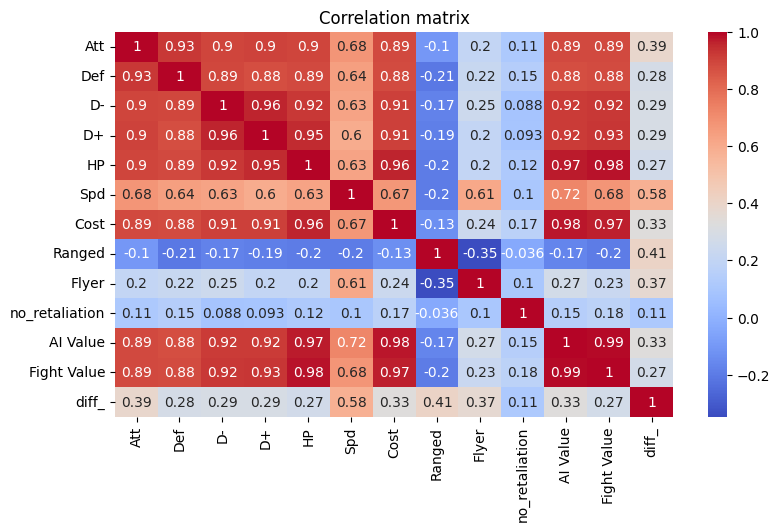

In [ ]:
dfa = df[['Name', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Cost', 'Ranged', 'Flyer',
       'no_retaliation', 'AI Value', 'Fight Value', 'diff_']]
corr_matrix = dfa.corr(method = 'pearson')
plt.figure(figsize = (9, 5))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation matrix')

We can see that Speed, Ranged and Flyer are the most important in explaining the difference between AI value and Fight Value. Hope this will be shown in the linear regression.

In [ ]:
dftest = df[df['Upgraded'] == 1]

In [ ]:
dftest['val_per_gold'] = round(dftest['Val']/dftest['Cost'], 2)
dftest['total_value'] = dftest['Val'] * dftest['Grw']
dftest['total_val_per_gold'] = round(dftest['total_value']/dftest['Cost'], 2)

In [ ]:
dftest.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Upgraded,AI Value,Fight Value,multi_att,poison,immunity,diff_,val_per_gold,total_value,total_val_per_gold
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,1,115,115,0.0,0,0.03,0.0,1.53,1610,21.47
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,1,184,115,1.0,0,0.00,60.0,1.23,1656,11.04
5,Royal Griffin,Castle,3.5,9,9,3,6,25,9,7,...,1,448,364,0.3,0,0.00,23.0,1.87,3136,13.07
7,Crusader,Castle,4.5,12,12,7,10,35,6,4,...,1,588,588,1.0,0,0.00,0.0,1.47,2352,5.88
9,Zealot,Castle,5.5,12,10,10,12,30,7,3,...,1,750,500,0.0,0,0.00,50.0,1.67,2250,5.00


In [ ]:
rank = [i for i in range(1, 11)]
rank = pd.DataFrame(rank, columns=['Rank'])

In [ ]:
df1 = pd.DataFrame(dftest.groupby('Town')['Val'].sum().sort_values(ascending = False))
df1['Town']=df1.index
df1.reset_index(drop = True, inplace = True)

In [ ]:
df3 = pd.concat([df1, rank], axis=1)

In [ ]:
df3 = df3.rename(columns = {'Town': 'Town1', 'Rank': 'Rank1'})
df3 = df3[['Town1', 'Val', 'Rank1']]
df3 = df3.sort_values(by = 'Town1').reset_index(drop = True)

In [ ]:
df4 = pd.DataFrame(dftest.groupby('Town')['val_per_gold'].sum().sort_values(ascending = False))
df4['Town1'] = df4.index
df4.reset_index(drop = True, inplace = True)
df4 = df4[['Town1', 'val_per_gold']]

In [ ]:
df5 = pd.concat([df4, rank], axis = 1).rename(columns = {'Town1': 'Town2', 'Rank': 'Rank2'})
df5 = df5.sort_values(by = 'Town2').reset_index(drop = True)

In [ ]:
df6 = pd.concat([df3, df5], axis =1, ignore_index = True)
df6.columns = ['Town1', 'value', 'Rank1', 'Town2', 'value_cost', 'Rank2']
df6['ecart'] = df6['Rank2'] - df6['Rank1']

In [ ]:
df6['pos-neg'] = df6['ecart'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df6

,Town1,value,Rank1,Town2,value_cost,Rank2,ecart,pos-neg
0,Castle,12961,1,Castle,11.28,6,5,1
1,Conflux,10654,7,Conflux,13.99,1,-6,0
2,Cove,11684,5,Cove,11.44,3,-2,0
3,Dungeon,12644,3,Dungeon,11.30,5,2,1
4,Fortress,9749,9,Fortress,10.26,9,0,0
5,Inferno,11359,6,Inferno,10.73,8,2,1
6,Necropolis,9468,10,Necropolis,10.13,10,0,0
7,Rampart,12656,2,Rampart,12.50,2,0,0
8,Stronghold,9910,8,Stronghold,11.09,7,-1,0
9,Tower,12641,4,Tower,11.33,4,0,0


Text(0, 0.5, 'value pe 1 gold')

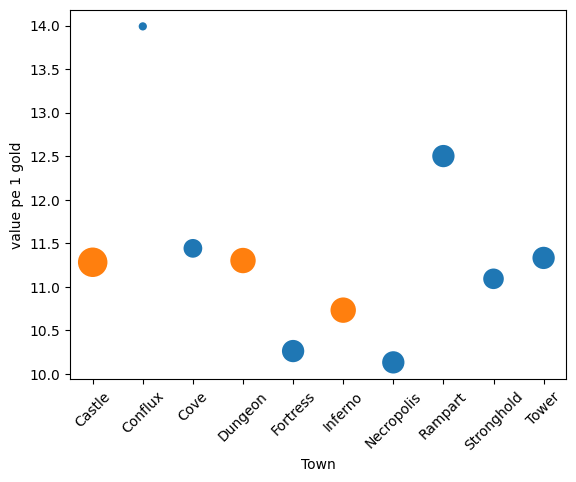

In [ ]:
sns.scatterplot(x = 'Town1', y = 'value_cost', data = df6, size = 'ecart', sizes = (50,500), legend = False, hue = 'pos-neg')
plt.xticks(rotation=45)
plt.xlabel('Town')
plt.ylabel('value pe 1 gold')

<Axes: title={'center': 'Sum of all units of a Town taken as 1'}, xlabel='Town'>

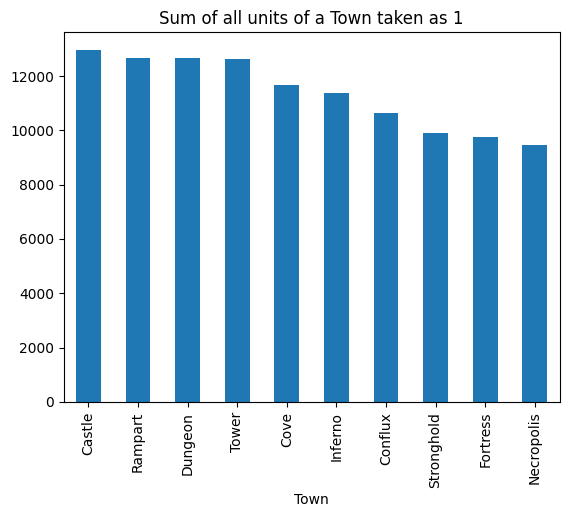

In [ ]:
dftest.groupby('Town')['Val'].sum().sort_values(ascending = False).plot(kind = 'bar', title = 'Sum of all units of a Town taken as 1')

<Axes: title={'center': 'Sum of all units of a Town taken as 1 at cost'}, xlabel='Town'>

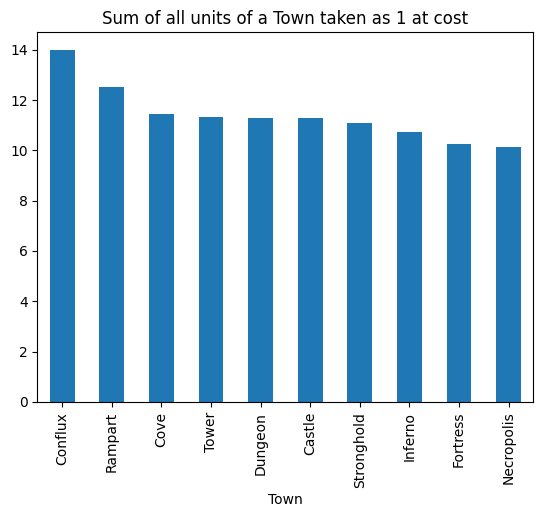

In [ ]:
dftest.groupby('Town')['val_per_gold'].sum().sort_values(ascending = False).plot(kind = 'bar', title = 'Sum of all units of a Town taken as 1 at cost')

<Axes: title={'center': 'Value per one week dwelling/gold'}, xlabel='Town'>

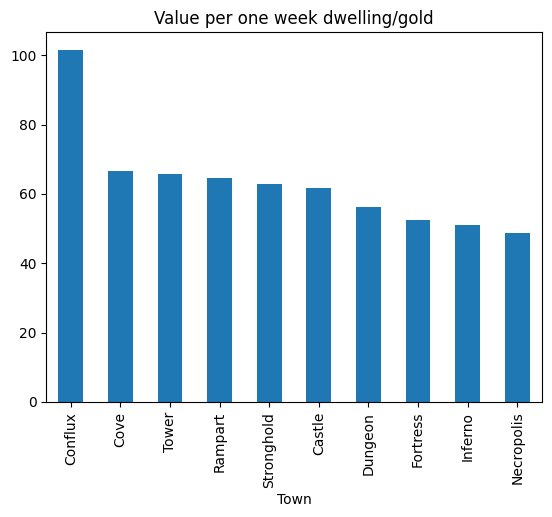

In [ ]:
dftest.groupby('Town')['total_val_per_gold'].sum().sort_values(ascending = False).plot(kind = 'bar', title = 'Value per one week dwelling/gold')

<Axes: xlabel='Town'>

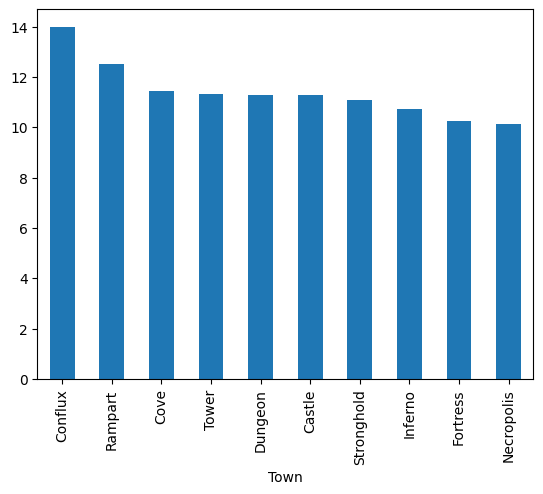

In [ ]:
dftest.groupby('Town')['val_per_gold'].sum().sort_values(ascending = False).plot(kind = 'bar')

In [ ]:
dftest[dftest['Level'] == 5.5].sort_values(by = 'total_value', axis = 0, ascending = False).head(28)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Upgraded,AI Value,Fight Value,multi_att,poison,immunity,diff_,val_per_gold,total_value,total_val_per_gold
51,Pit Lord,Inferno,5.5,13,13,13,17,45,7,3,...,1,1224,1071,0.0,0,0.0,14.0,1.75,3672,5.25
93,Thunderbird,Stronghold,5.5,13,11,11,15,60,11,3,...,1,1106,869,0.0,0,0.0,27.0,1.58,3318,4.74
65,Power Lich,Necropolis,5.5,13,10,11,15,40,7,3,...,1,1079,889,0.3,0,0.0,21.0,1.80,3237,5.40
79,Minotaur King,Dungeon,5.5,15,15,12,20,50,8,3,...,1,1068,890,0.0,0,0.0,20.0,1.86,3204,5.57
107,Mighty Gorgon,Fortress,5.5,11,16,12,16,70,6,3,...,1,1028,1028,0.0,0,0.0,0.0,1.71,3084,5.14
37,Master Genie,Tower,5.5,12,12,13,16,40,11,3,...,1,942,748,0.0,0,0.0,26.0,1.57,2826,4.71
135,Sorceress,Cove,5.5,12,9,10,16,35,7,3,...,1,852,655,0.0,0,0.0,30.0,1.51,2556,4.52
23,Dendroid Soldier,Rampart,5.5,9,12,10,14,65,4,3,...,1,803,765,0.0,0,0.0,5.0,1.89,2409,5.67
9,Zealot,Castle,5.5,12,10,10,12,30,7,3,...,1,750,500,0.0,0,0.0,50.0,1.67,2250,5.00
121,Magma Elemental,Conflux,5.5,11,11,6,10,40,6,4,...,1,490,490,0.0,0,0.1,0.0,0.98,1960,3.92


In [ ]:
df[df['Level'] == 7.5].sort_values(by = 'diff_', axis = 0, ascending = False).head(28)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity,diff_
41,Titan,Tower,7.5,24,24,40,60,300,11,1,...,1,0,0.0,1,7500,5000,0.0,0,0.10,50.0
13,Archangel,Castle,7.5,30,30,50,50,250,18,1,...,0,1,0.0,1,8776,6033,0.0,0,0.00,45.0
69,Ghost Dragon,Necropolis,7.5,19,17,25,50,200,14,1,...,0,1,0.0,1,4696,3228,0.0,1,0.00,45.0
27,Gold Dragon,Rampart,7.5,27,27,40,50,250,16,1,...,0,1,0.0,1,8613,6220,0.3,0,0.75,38.0
55,Arch Devil,Inferno,7.5,26,28,30,40,200,17,1,...,0,1,1.0,1,7115,5243,0.0,0,0.00,36.0
125,Phoenix,Conflux,7.5,21,18,30,40,200,21,2,...,0,1,0.0,1,6721,4929,0.3,0,0.25,36.0
139,Haspid,Cove,7.5,29,20,30,55,300,12,1,...,0,0,0.0,1,7220,5554,0.0,1,0.00,30.0
83,Black Dragon,Dungeon,7.5,25,25,40,50,300,15,1,...,0,1,0.0,1,8721,6783,0.3,0,1.00,29.0
97,Ancient Behemoth,Stronghold,7.5,19,19,30,50,300,9,1,...,0,0,0.0,1,6168,5397,0.0,0,0.00,14.0
111,Chaos Hydra,Fortress,7.5,18,20,25,45,250,7,1,...,0,0,1.0,1,5931,5272,0.5,0,0.00,12.0


<Axes: xlabel='Town'>

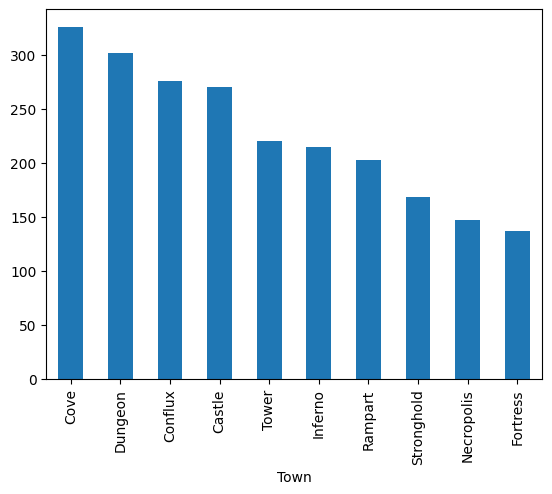

In [ ]:
df.groupby('Town')['diff_'].sum().sort_values(ascending = False).plot(kind = 'bar')